<a href="https://colab.research.google.com/github/Git-Hub-Pro/Kalmanfilter/blob/master/simple_kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/') 

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [0]:
def get_volt():
  """ Measure voltage."""
  v = np.random.normal(0,2) 
  volt_true  = 14.4  
  z_volt_meas = volt_true + v
  return z_volt_meas

In [0]:
def kalman_filter(z_meas,x_esti,P):
  """Kalman Filter Algorithm for One Variable."""
  # 아래와 같은 식은 칼만 필터 공식을 그대로 사용한다. (A,H,Q,R만 시스템 모델링을 한 값을 넣어준다.)
  # (1) Prediction
  x_pred = A * x_esti
  P_pred = A * P *A + Q

  # (2) Kalman Gain
  K = P_pred*H / (H * P_pred * H * R)

  # (3) Estimation.
  x_esti = x_pred + K *(z_meas - H * x_pred)

  # (4) Error Covariance.
  P  = P_pred - K * H * P_pred

  return x_esti, P

In [0]:
# Input Parameters
time_end = 10
dt = 0.2

In [0]:
# Initialization for system model.
A = 1
H = 1
Q = 0
R = 4

# Initialization for estimation.
x_0 = 14
P_0 = 6

In [0]:
time = np.arange(0,time_end,dt)
n_samples = len(time)
volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

In [0]:
x_esti, P = None, None
for i in range(n_samples):
    z_meas = get_volt()
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas,x_esti,P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti

Text(0, 0.5, 'Voltage [V]')

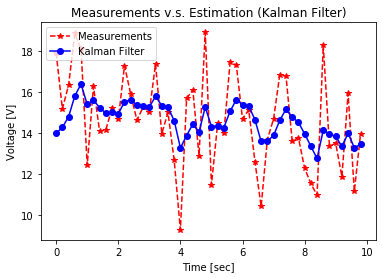

In [11]:
plt.plot(time,volt_meas_save,'r*--',label='Measurements')
plt.plot(time,volt_esti_save,'bo-',label='Kalman Filter')
plt.legend(loc='upper left')
plt.title('Measurements v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')